In [1]:
{'mail': 'dimash.r53@gmail.com',
 'id': 3374841886,
 'type': 'regression',
 'dataset': {'name': 'Boston Housing Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
 'method': ['Надарая-Ватсона', 'Нейронная сеть (Перцептрон)']}

{'dataset': {'name': 'Boston Housing Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
 'id': 3374841886,
 'mail': 'dimash.r53@gmail.com',
 'method': ['Надарая-Ватсона', 'Нейронная сеть (Перцептрон)'],
 'type': 'regression'}

In [2]:
from zlib import crc32
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from scipy.spatial.distance import cdist
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [3]:
data = load_boston()
X, y = data.data, data.target

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #perform split on train/test set

Далее описан обычный класс, который реализует стандартизацию.

In [5]:
class StandardScaler(object):
    def __init__(self):
        self.mean = 0
        self.std = 1
    
    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        return (data-self.mean)/self.std
    
    def transform(self, data):
        return (data-self.mean)/self.std

In [6]:
stand = StandardScaler()
X_train = stand.fit(X_train)
X_test = stand.transform(X_test)

# Визуализация



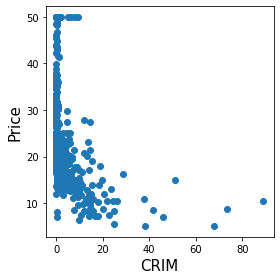

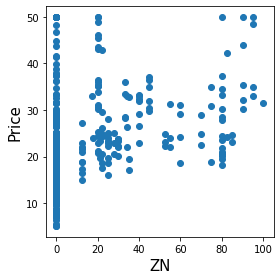

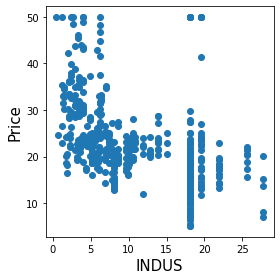

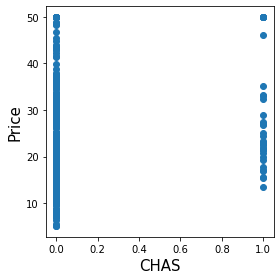

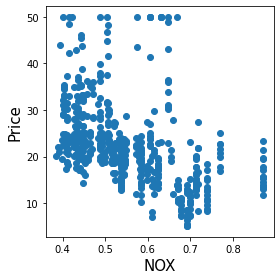

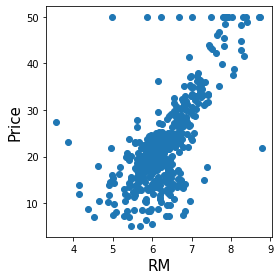

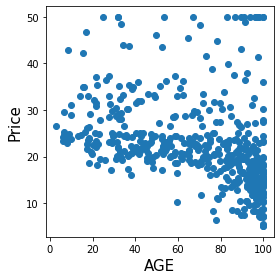

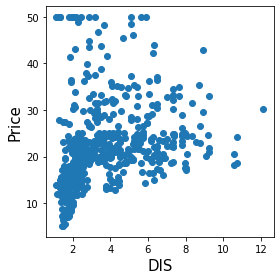

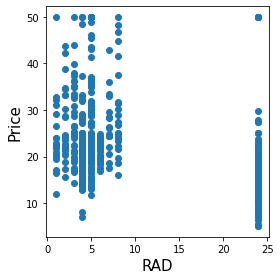

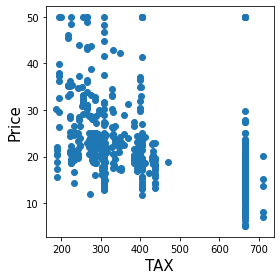

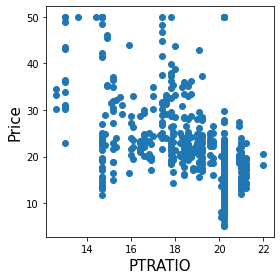

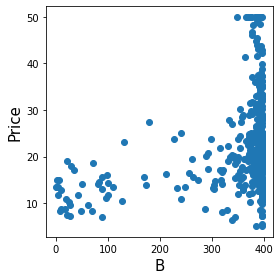

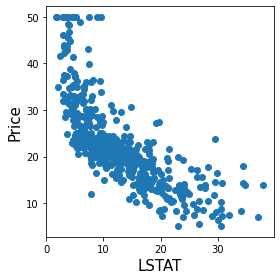

In [7]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 4))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# Perceptron
Реализация пецептрона была взята из библиотеки sklearn.

In [8]:
mlpregressor = MLPRegressor(random_state=1, max_iter=400)
mlpregressor.fit(X_train,y_train)
mlpregressor


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=400,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
mlpregressor.score(X_test, y_test)


0.7723987605324115

In [10]:
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [11]:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=400, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...dam',
                                    tol=0.0001, validation_fraction=0.1,
                                    verbose=False, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0

In [12]:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=400, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...dam',
                                    tol=0.0001, validation_fraction=0.1,
                                    verbose=False, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0

In [13]:
print('Best parameters found:\n', gridsearchcv.best_params_)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [14]:
y_pred = gridsearchcv.predict(X_test)

In [15]:
print(f'R2 score = {r2_score(y_test, y_pred)}')

R2 score = 0.8606103135286863


Надарая-Ватсона

In [17]:
class FNV(object):
    def __init__(self, kernel=None):
        self.X, self.Y = None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def predict(self, X):
        features = np.sum(self.Y*self.kernel(cdist(X, self.X)), axis=-1)
        return features/(np.sum(self.kernel(cdist(X, self.X)), axis=-1)+1e-10)
    def fit(self, X, Y):
        self.X, self.Y = np.array(X), np.array(Y)

In [18]:
def K_quadratic(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

def K_exp(distance, h=0.2):
    ret = np.array(distance)/h
    return np.exp(-2 * ret* ret)

Kernels = [K_quadratic, K_exp]
Windows = np.linspace(0.1, 2, 5)

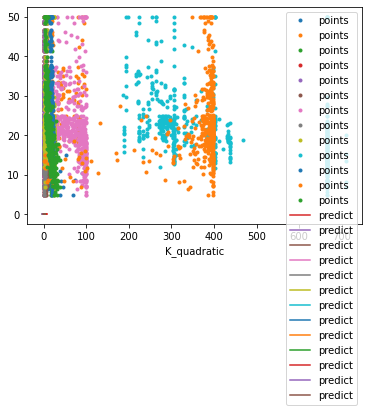

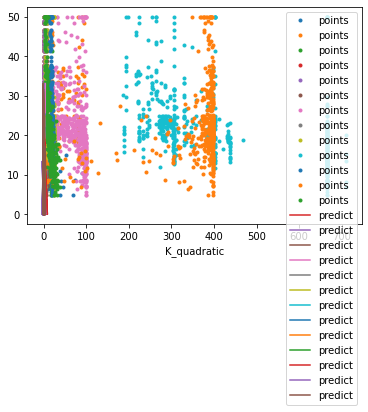

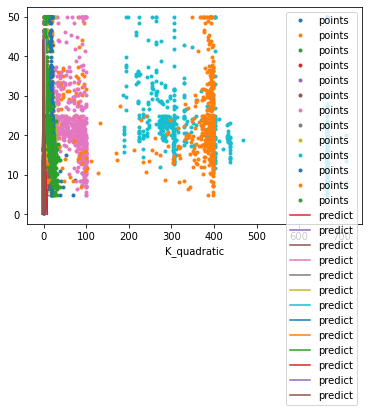

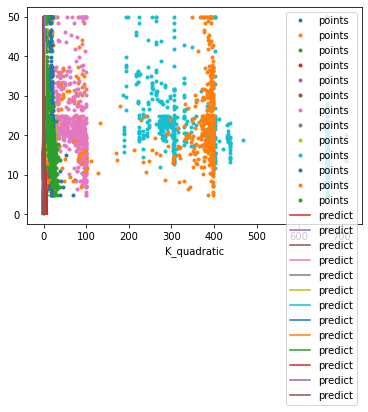

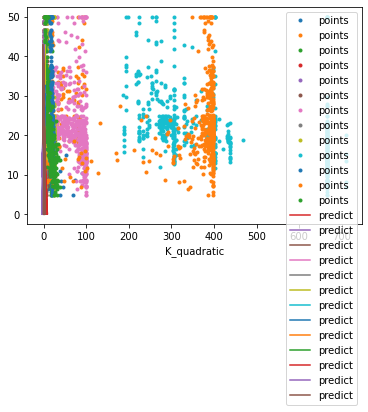

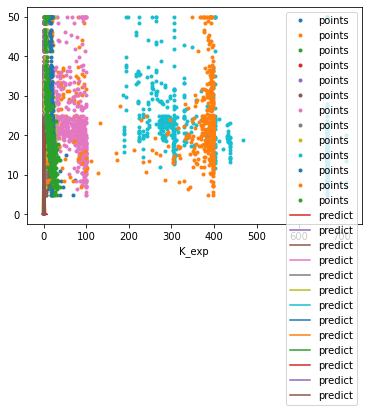

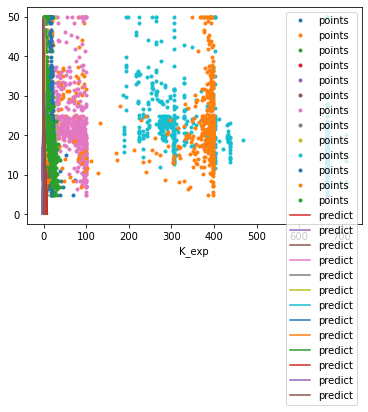

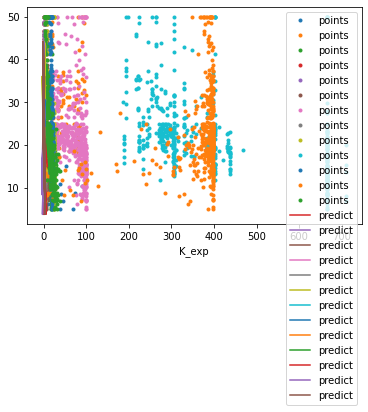

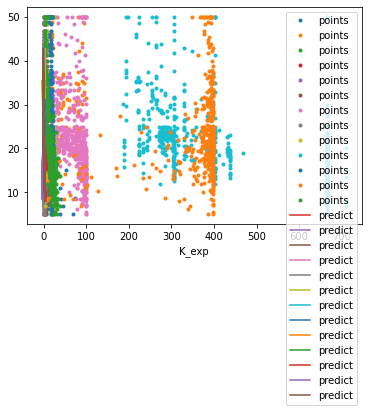

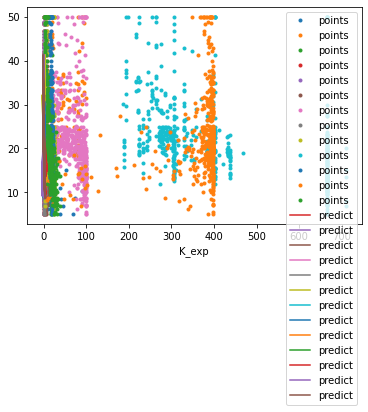

In [19]:
preds = []
for K in Kernels:
    for h in Windows:
        model = FNV(kernel = lambda x : K(x, h))
        model.fit(X_train, y_train)
        plt.plot(X, y, '.', label='points')
        preds.append(model.predict(X_test))
        plt.plot(X_test, preds[-1], label='predict')
        plt.legend(loc='best')
        plt.xlabel(K.__name__)
        plt.show()

In [20]:
best_r2, best_K, best_h = r2_score(y_test, preds[0]), None, None
for i, K in enumerate(Kernels):
    for j, h in enumerate(Windows):
        r2 = r2_score(y_test, preds[i + j])
        print(f'{K.__name__} and h = {h}: r2_score = {r2}')
        if r2 > best_r2:
            best_K, best_h, best_r2 = K.__name__, h, r2

K_quadratic and h = 0.1: r2_score = -6.150569286794575
K_quadratic and h = 0.575: r2_score = -4.254332607532918
K_quadratic and h = 1.05: r2_score = -0.7372603211670343
K_quadratic and h = 1.525: r2_score = 0.3504861617296299
K_quadratic and h = 2.0: r2_score = 0.6292670464393078
K_exp and h = 0.1: r2_score = -4.254332607532918
K_exp and h = 0.575: r2_score = -0.7372603211670343
K_exp and h = 1.05: r2_score = 0.3504861617296299
K_exp and h = 1.525: r2_score = 0.6292670464393078
K_exp and h = 2.0: r2_score = -5.631699875940494


In [21]:
best_K, best_h, best_r2

('K_quadratic', 2.0, 0.6292670464393078)

Как и следовало ожидать перцептрон оказался лучше, но я считаю, что результат метода Надарая-Ватсона тоже является хорошим. Возможно если уменьшить шаг для нахождения окна и добавить больше ядер качество немного улучшилось бы.